## $\color{green}{\text{Create GMD Figure 2}}$
#### $\color{red}{\text{(Uses Module data from Bob's run on Amarel)}}$

In [3]:
# Input PY modules and FACTS module names/data
#
WHOSRUN     = 'Bob4Fig2'
#
%run ./T3_IP_modules.ipynb 
#
modNO       = df['Num'].values   # Number of datasets Module outputs
# modNO=np.arange(1)
# SCENARIO    = ['ssp126', 'ssp245', 'ssp585'];  
SCENARIO    = ['ssp585'];
#
# P-A.      
df_TEMP      = []
        
# Loop over scenario. 
for val in modNO:
    for scenario in SCENARIO: 
        #
        # ........................................................................................
        MODULE      = df.loc[val].at['Module']
        SUB_MODULE  = df.loc[val].at['sub_Module']
        #
        # Skip if data is absent.
        if df.loc[val].at['O/P_Data'] == 'XXX':
           continue 
        # 
        # Pick the data files. (Need to resolve the localhost naming)
        if scenario == 'ssp585':
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}.localhost/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.localhost.'.format(arg1=scenario) + df.loc[val].at['O/P_Data']
        else:
            dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}/output/'.format(arg1=scenario)
            dataFILE   = 'coupling.{arg1}.'.format(arg1=scenario) + df.loc[val].at['O/P_Data']
        #   
        dataPATH   = dataFOLDER+dataFILE
        #
        # Print to check the nc file details.
        print_nc = 0;    print_var = 0
        # 
        # IMPORT .nc data
        %run ./T3_IP_ncDATA.ipynb   #I/P data
        # ........................................................................................
        #
        # Loop over year
        for yy in yrs:
            # Find year index to pick SLC value
            Yind    = np.where(yrs == yy)[0][0]
            if SUB_MODULE == 'temperature':
                GMSL = sst[:,Yind,0]
            else:
                GMSL = slc[:,Yind,0]
            #
            # Find Percentile ranges.
            percentList = [50, 5, 17, 83, 95]
            #
            pcntle = np.percentile(GMSL[:], percentList ); 
            pcntle = np.around(pcntle,2)
            #
            COMP = df['di'][val]
            #
            temp = [COMP,MODULE,SUB_MODULE, scenario, yy, ] + pcntle.tolist()
            df_TEMP.append( temp )
# Group the W_F column
res = pd.DataFrame( df_TEMP, columns=['COMPONENT','MODULE','subMODULE', 'SSP', 'Year', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] ) # .set_index(['W_F','SSP'])
res
# df_TEMP

<IPython.core.display.Javascript object>

/tmp/ipykernel_7002/3913406687.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


T3_IP_modules WHOSRUN =  Bob4Fig2


,COMPONENT,MODULE,subMODULE,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,Glaciers,ipccar5,glaciers,ssp585,2020,20.0,8.00,13.0,25.00,28.00
1,Glaciers,ipccar5,glaciers,ssp585,2030,30.0,10.00,20.0,39.00,44.00
2,Glaciers,ipccar5,glaciers,ssp585,2040,41.0,17.00,29.0,55.00,62.00
3,Glaciers,ipccar5,glaciers,ssp585,2050,55.0,25.00,39.0,74.00,83.00
4,Glaciers,ipccar5,glaciers,ssp585,2060,71.0,36.95,52.0,96.00,109.00
...,...,...,...,...,...,...,...,...,...,...
67,TE,tlm,oceandynamics,ssp585,2060,126.0,93.00,106.0,150.00,172.05
68,TE,tlm,oceandynamics,ssp585,2070,162.0,119.95,136.0,193.00,225.00
69,TE,tlm,oceandynamics,ssp585,2080,202.5,148.00,169.0,242.00,283.05
70,TE,tlm,oceandynamics,ssp585,2090,246.5,179.00,204.0,296.00,345.05


In [5]:
df.index.values

array([0, 1, 2, 3, 4, 5, 6, 7])

## Plot: GMSL 4 Components of W_F and SSP's

#### Set Global figure def

#### Color Scheme

In [2]:
# Colors updated to match updated SPM colors
color_GrIS = np.array([0, 173,207])/255
color_AIS = np.array([23  ,60 ,  102])/255
color_Glaciers = np.array([247 ,148,  32])/255
color_TE = np.array([231 ,29 ,  37])/255
color_ssp585 = np.array([149 ,27 ,  30])/255
# scencolors=[color_SSP585, color_SSP370, color_SSP245, color_SSP126, color_SSP119]
# scencolors=[color_ssp585, color_ssp245, color_ssp126]
# scencolors1 = list(reversed(scencolors))


### Workflow components

In [3]:
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm']
wf1f = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2', 'TE-tlm']
wf2e = ['GrIS-emulandice', 'AIS-larmip', 'Glaciers-emulandice','TE-tlm']
wf2f = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2','TE-tlm']
# wfCOMMON = ['LandWater-ssp', 'Dynm-tlm', 'VLM-kopp14']
#
WORKFLO = ["wf1e","wf1f","wf2e","wf2f"]


#### Define Axis

#### Plot Graph (single Subplot)

### Plot figure over Multi- Workflow

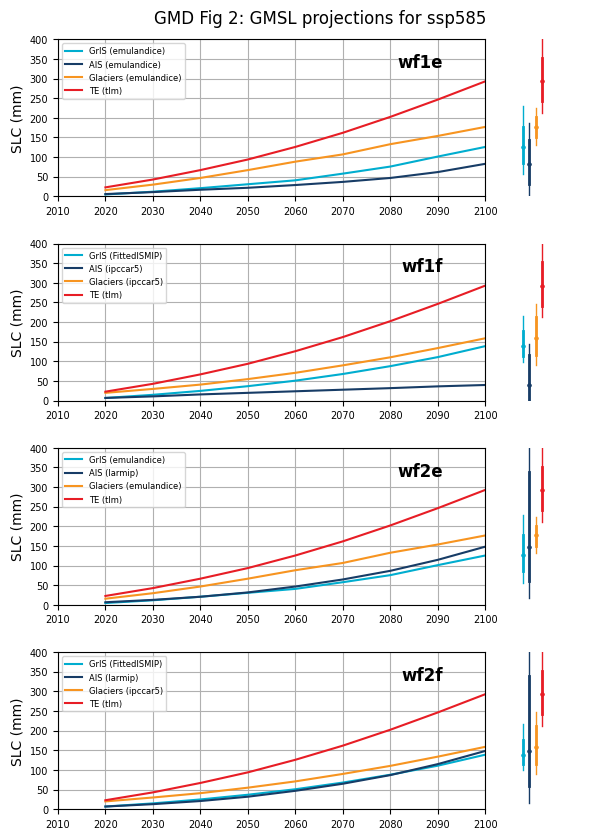

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(7,10), 'figure.dpi':100})
#
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.4, hspace=0.3)
#
# Global
xlim  = [2010,2100]
ylim = [0 , 400]
xlim1 = [.1,2]
#
# get the years.
Xax1 = res.loc[:,"Year"].unique()
#
SSP = res.loc[:,"SSP"].unique()
COMPONENT = res.loc[:,"COMPONENT"].unique()
MODULE = res.loc[:,"MODULE"].unique()
subMODULE = res.loc[:,"subMODULE"].unique()
#
# Specify subplot Axis.
ax1_wf1e = plt.subplot(grid[0, :4]); ax2_wf1e = plt.subplot(grid[0, 4]);
ax1_wf1f = plt.subplot(grid[1, :4]); ax2_wf1f = plt.subplot(grid[1, 4]);
ax1_wf2e = plt.subplot(grid[2, :4]); ax2_wf2e = plt.subplot(grid[2, 4]);
ax1_wf2f = plt.subplot(grid[3, :4]); ax2_wf2f = plt.subplot(grid[3, 4]);
#
#
#for ss in SSP: # Loop through each SSP
ss= "ssp585"
#
for ww in WORKFLO:
    # Select subplot axis based on workflow
    ax1 = eval(f'ax1_{ww}')
    ax2 = eval(f'ax2_{ww}')
    #
    # X axis for the Right (Bar) Plots
    Xax2 = np.array([[.2,.2]]) 
    #
    # Plot Left 
    # Within a single sub-plot, Loop over individual WF components.
    for WFcomp in np.arange(len(eval(ww))): # Index of elements within each workflow (e.g. GrIS-emulandice)
        CoMpOnEnT = (eval(ww)[WFcomp]).split('-')[0] # e.g. GrIS
        MoDuLe = (eval(ww)[WFcomp]).split('-')[1]    # e.g. emulandice
        Yax1 = res.loc[((res['SSP'] == ss) & (res["COMPONENT"] == CoMpOnEnT) & (res['MODULE'] == MoDuLe)),"col_50" ] #Glacier
        # attach a color to the component.
        ax1.plot(Xax1, Yax1, label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'))
        #
        # Plot Right
        Yax2_1 = res.loc[((res['SSP'] == ss) & (res["COMPONENT"] == CoMpOnEnT) & (res['MODULE'] == MoDuLe) & (res['Year'] == 2100)),("col_5", "col_95") ].values
        Yax2_2 = res.loc[((res['SSP'] == ss) & (res["COMPONENT"] == CoMpOnEnT) & (res['MODULE'] == MoDuLe) & (res['Year'] == 2100)),("col_17", "col_83") ].values 
        Yax2_3 = res.loc[((res['SSP'] == ss) & (res["COMPONENT"] == CoMpOnEnT) & (res['MODULE'] == MoDuLe) & (res['Year'] == 2100)),("col_50","col_50") ].values 
        #
        ax2.plot(Xax2.transpose(), Yax2_1.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=1)
        ax2.plot(Xax2.transpose(), Yax2_2.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=2)
        ax2.plot(Xax2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{CoMpOnEnT}'),ms = 2,mfc='none')
        Xax2 = Xax2+.15
        #
    ax1.tick_params(axis='both', labelsize=7)
    ax1.legend(loc='upper left',prop={'size': 6}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
    ax1.grid()
    # ax1.set_title("Total (Median) GMSL projections for " + ww); ax1.set_xlabel("Years"); 
    ax1.set_ylabel("SLC (mm)")
    # WorkFlow Title.
    ax1.text(.9, .91, ww, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=12,transform=ax1.transAxes)
    # ax1.text(.9, .9, eval(ww), horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
    #
    ax2.set_ylim(ylim); ax2.axis('off') 
    ax2.set_xlim(xlim1);
    #
plt.suptitle('GMD Fig 2: GMSL projections for {one}'.format(one=ss),y=0.91)
# plt.supxlabel('common x label')
# plt.supylabel('common y label')
plt.show()

In [5]:
# Workflows differ based on their handeling of the cryospheric components (Icesheets and glaciers) 
# They use common modules for projecting vertical land motion (kopp14/verticallandmotion), Sterodynamics and global mean thermal expansion (tlm/oceandynamics), and land water storage (ssp/landwaterstorage